# Proyek Analisis Data: Bike Sharing Dataset

*   Nama: Hafiz Isnaini
*   Email: hafiz.isnaini@gmail.com
*   ID Dicoding: hafizisnaini

# Menentukan Pertanyaan Bisnis

*   Bagaimana hubungan antara suhu udara dengan jumlah pengendara sepeda harian?
*   Bagaimana pengaruh kelembapan udara terhadap jumlah pengendara sepeda harian?
*   Bagaimana pengaruh hari terhadap pengendara sepeda casual lalu bagaimana dengan pengendara yang teregister?
* Bagaimana pengaruh bulan dan musim terhadap jumlah pengendara sepeda?


# Import Semua Packages/Library yang Digunakan


In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data Wrangling

# Gathering Data

In [2]:
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

#muat data perhari
dfDay = pd.read_csv(path + "/day.csv")

#normalisasi nilai
dfDay.hum *= 100
dfDay.windspeed *= 67
dfDay.yr += 2011
dfDay.atemp = 66*dfDay.atemp - 16
dfDay.temp = 47*dfDay.temp - 8

dfDay.head(15)

100%|██████████| 286k/286k [00:00<00:00, 41.9MB/s]

Extracting files...


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,6,0,2,8.175849,7.999250,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,9.083466,7.346774,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,1.229108,-3.499270,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,1.400000,-1.999948,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,2.666979,-0.868180,43.6957,12.522300,82,1518,1600
5,6,2011-01-06,1,2011,1,0,4,1,1,1.604356,-0.608206,51.8261,6.000868,88,1518,1606
6,7,2011-01-07,1,2011,1,0,5,1,2,1.236534,-2.216626,49.8696,11.304642,148,1362,1510
7,8,2011-01-08,1,2011,1,0,6,0,2,-0.245000,-5.291236,53.5833,17.875868,68,891,959
8,9,2011-01-09,1,2011,1,0,0,0,1,-1.498349,-8.332450,43.4167,24.250650,54,768,822
9,10,2011-01-10,1,2011,1,0,1,1,1,-0.910849,-6.041392,48.2917,14.958889,41,1280,1321


Insight:
* Jumlah pengguna sepeda pada akhir pekan atau hari libur cenderung lebih sedikit dibandingkan pada hari kerja
* Pada hari kerja, pengguna sepeda kasual cenderung lebih sedikit dibandingkan dengan hari libur atau akhir pekan
* Berbeda dengan pengguna sepeda kasual, pengguna sepeda yang teregister cenderung lebih banyak pada hari kerja dibandingkan pada akhir pekan atau hari libur


# Assessing Data

Assess data harian

In [3]:
dfDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
print("Duplicated: ", dfDay.duplicated().sum())
dfDay.isna().sum()

Duplicated:  0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [5]:
dfDay.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,15.283085,15.307363,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,8.603397,10.755438,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-5.220871,-10.781406,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2.000000,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,7.842925,6.297605,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,15.421651,16.124378,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,22.804575,24.167732,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,32.498349,39.499136,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Insight:
* Dataset berisi 731 baris dan 16 kolom
* Seluruh data lengkap tanpa missing value dan tidak ada duplikasi data
* Total pengguna sepeda terbanyak dalam 1 hari pernah menembus 8714
* Pengguna terbanyak dalam 1 hari pernah menembus 3410 untuk pengguna kasual dan 6946 pengguna teregister
* Kecepatan angin harian bervariasi dengan kecepatan maksimum yang tercatat adalah 34 m/s
* Humidity minimum terbaca 0, yang kemungkinan merupakan kesalahan. Humidity cukup erat kaitannya dengan suhu, pada kasus ini, suhu terukur tidak terlalu rendah maupun tinggi, sehingga ada kemungkinan humidity yang tertera merupakan suatu kesalahan

# Cleaning Data

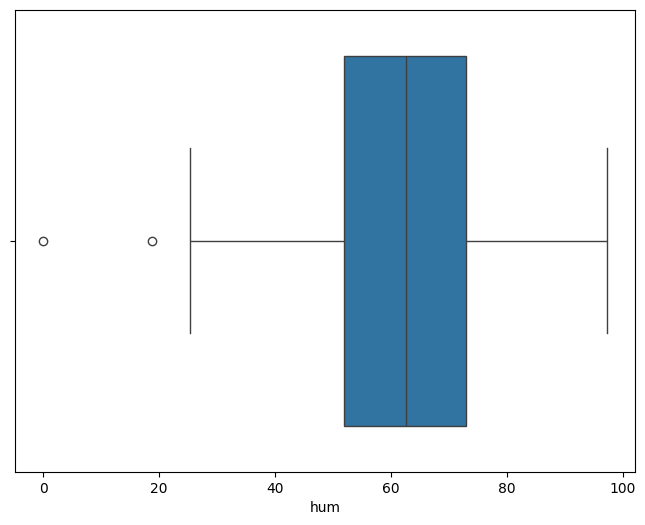

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dfDay['hum'])
plt.show()

Insight:
* Terdapat humidity yang bernilai 0 ketika menjalankan perintah dfDay.describe(). Humidity bernilai 0 merupakan hal yang hampir mustahil terjadi secara alami, untuk itu diperlukan cleaning terhadap nilai yang diduga merupakan outliers.
* Ada dua nilai yang merupakan outliers, selanjutnya data ini dibuang

In [7]:
# menentukan outliers data harian
q25, q75 = np.percentile(dfDay.hum, 25), np.percentile(dfDay.hum, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = np.where(dfDay.hum < minimum)
dfDay.iloc[outliers]    # menampilkan outlier pada data harian

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,2011,2,0,6,0,1,10.760849,9.832664,18.7917,34.000021,532,1103,1635
68,69,2011-03-10,1,2011,3,0,4,1,3,10.287277,9.454088,0.0000,17.545759,46,577,623


In [8]:
# membuang data outlier pada data harian
dfDay = dfDay.drop(dfDay.index[outliers])

#Exploratory Data Analysis (EDA)

#Explore


In [9]:
dfDay.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.00000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,366.840878,2.500686,2011.502058,6.530864,0.028807,2.99177,0.684499,1.393690,15.296141,15.322902,62.935891,12.726883,849.710562,3663.898491,4513.609053
std,210.842272,1.109555,0.500339,3.450107,0.167377,2.00410,0.465034,0.542191,8.611576,10.766093,13.975754,5.136379,686.820245,1555.329576,1931.582099
min,1.000000,1.000000,2011.000000,1.000000,0.000000,0.00000,0.000000,1.000000,-5.220871,-10.781406,25.416700,1.500244,2.000000,20.000000,22.000000
25%,185.000000,2.000000,2011.000000,4.000000,0.000000,1.00000,0.000000,1.000000,7.823349,6.291236,52.208300,9.041650,316.000000,2506.000000,3190.000000
50%,367.000000,3.000000,2012.000000,7.000000,0.000000,3.00000,1.000000,1.000000,15.500000,16.207736,62.750000,12.124789,721.000000,3667.000000,4549.000000
75%,549.000000,3.000000,2012.000000,10.000000,0.000000,5.00000,1.000000,2.000000,22.824151,24.209114,73.041700,15.624668,1097.000000,4790.000000,5976.000000
max,731.000000,4.000000,2012.000000,12.000000,1.000000,6.00000,1.000000,3.000000,32.498349,39.499136,97.250000,29.584721,3410.000000,6946.000000,8714.000000


Insight
* Total data harian menjadi 729 setelah data dibersihkan
* Rata-rata pengendara harian sebanyak 4513 dengan minimum 22 dan maksimum 8714
* Rata-rata suhu terasa (atemp) adalah 15.29 Celcius dengan minimum -10.78 Celcius dan maksimum 39.49 Celcius
* Setelah data dibersihkan, rata-rata kelembapan udara menjadi 62.93% dengan minimum 25.41% dan maksimum 97.25%
* Rata-rata cuaca harian (weathersit) adalah 1.39 yang berarti cuaca umumnya cerah dan berawan
* Jumlah pengendara registered cenderung lebih banyak dari harian

#Visualization & Explanatory Analysis

# Pertanyaan 1:

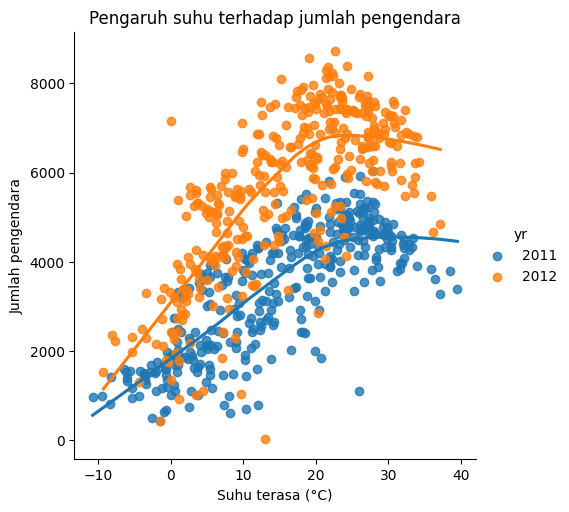

In [10]:
sns.lmplot(data=dfDay, x="atemp", y="cnt", lowess=True, hue='yr');
plt.title("Pengaruh suhu terhadap jumlah pengendara")
plt.xlabel("Suhu terasa (°C)")
plt.ylabel("Jumlah pengendara")
plt.show()

Insight:
* Jika hanya berpatokan pada suhu, pengendara sepeda cenderung lebih banyak ketika suhu sekitar 20°C dan sedikit mengalami penurunan saat suhu diatasnya. Namun pada suhu dibawah 20°C, jumlah pengendara sepeda menurun drastis.
* Jumlah pengendara sepeda meningkat pada tahun 2012 dibandingkan dengan tahun sebelumnya dengan pola yang sama, dimana jumlah pengendara cenderung lebih banyak ketika suhu sekitar 20°C.

# Pertanyaan 2:

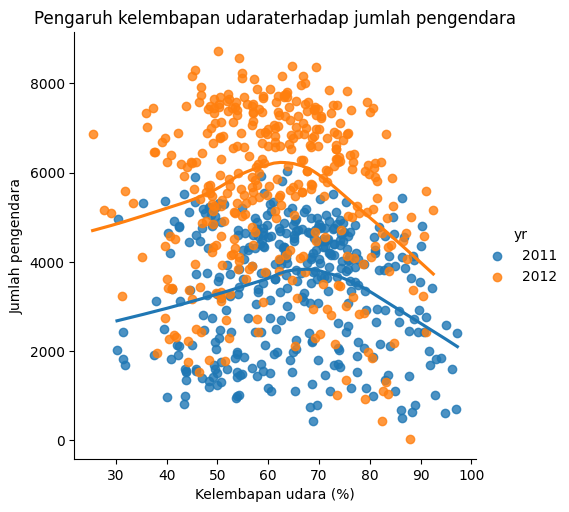

In [11]:
sns.lmplot(data=dfDay, x="hum", y="cnt", lowess=True, hue='yr');
plt.title("Pengaruh kelembapan udaraterhadap jumlah pengendara")
plt.xlabel("Kelembapan udara (%)")
plt.ylabel("Jumlah pengendara")
plt.show()

Insight:
* Jumlah pengendara sepeda cenderung mengalami peningkatan saat kelembapan udara disekitar 60-70%. Namun perbedaan jumlah pengendara sepeda terhadap perubahan kelembapan tidak terlalu signifikan, sehingga ada kemungkinan kelembapan tidak terlalu berpengaruh terhadap jumlah pengendara sepeda.

# Pertanyaan 3:

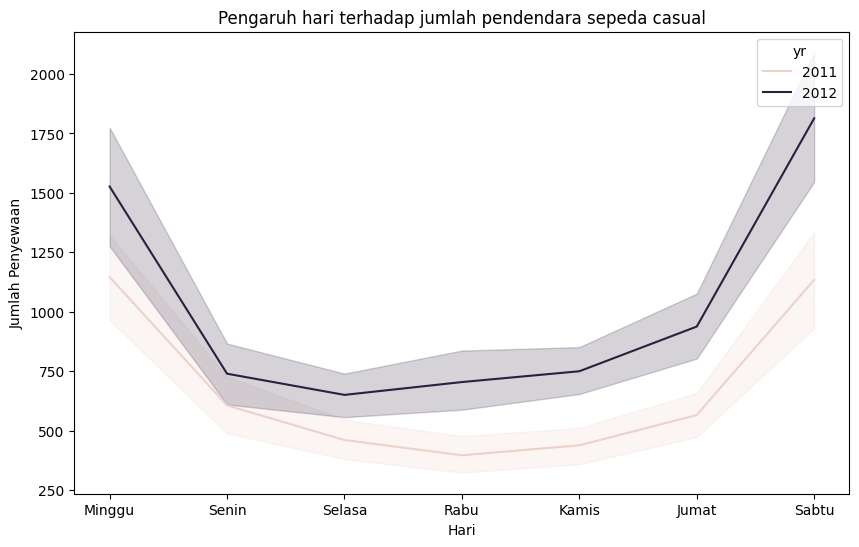

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday', y='casual', data=dfDay, hue='yr')
plt.title('Pengaruh hari terhadap jumlah pendendara sepeda casual')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(dfDay['weekday'].unique(), ['Sabtu', 'Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat'])
plt.show()

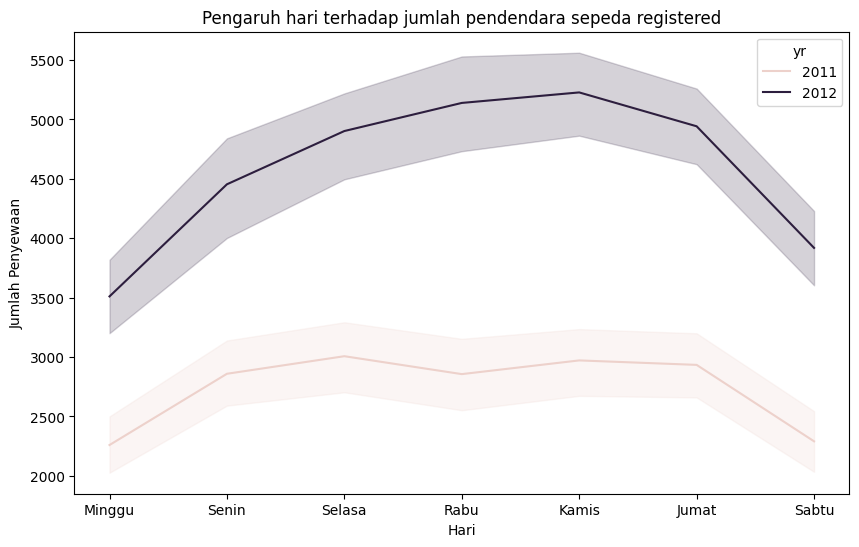

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday', y='registered', data=dfDay, hue='yr')
plt.title('Pengaruh hari terhadap jumlah pendendara sepeda registered')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(dfDay['weekday'].unique(), ['Sabtu', 'Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat'])
plt.show()

Insight:
* Jumlah pengendara sepeda casual mengalami peningkatan drastis ketika akhir pekan sementara jumlah pengendara teregister justru menurun ketika akhir pekan

# Pertanyaan 4:

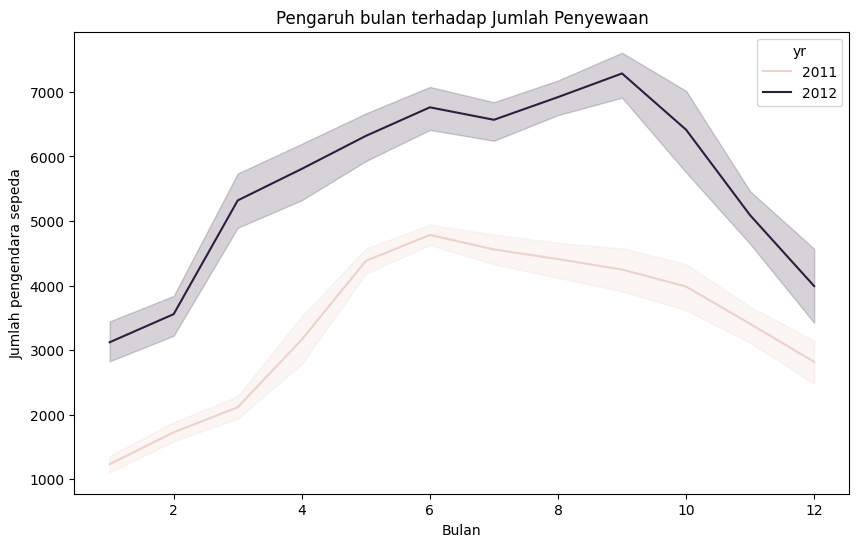

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dfDay, x='mnth', y='cnt', hue='yr')
plt.title('Pengaruh bulan terhadap Jumlah Penyewaan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah pengendara sepeda')
plt.show()

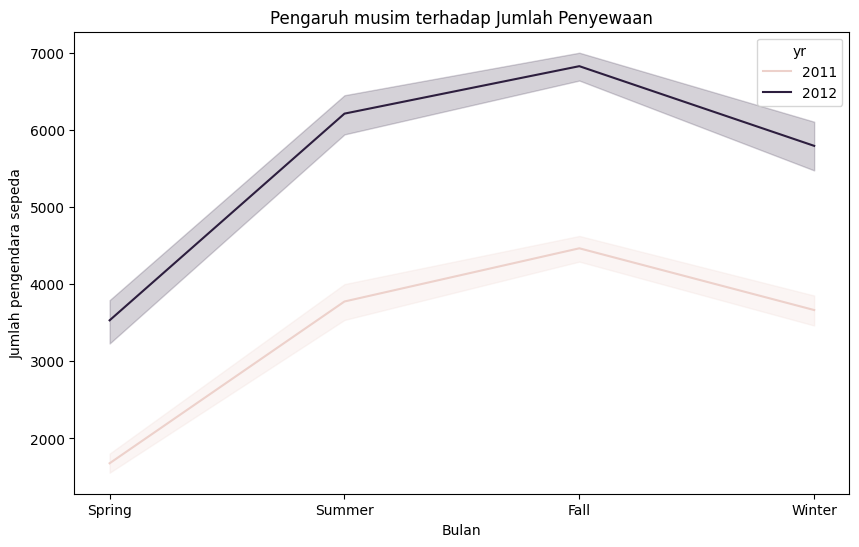

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dfDay, x='season', y='cnt', hue='yr')
plt.title('Pengaruh musim terhadap Jumlah Penyewaan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah pengendara sepeda')
plt.xticks(dfDay['season'].unique(), ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

Insight:
* Jumlah pengendara meningkat mulai dari bulan 2 dan mulai menurun saat bulan 9. Ketika dihubungkan dengan musim, pada bulan 2 mulai memasuki musim panas dan pada bulan 9 mulai memasuki musim dingin

# Conclusion

* Kecendrungan pengendara sepeda meningkat ketika suhu sekitar 20°C, hal ini kemungkinan besar didukung oleh cuaca yang cerah dan musim pada hari tersebut
* Kelembapan udara tidak terlalu memberikan pengaruh yang signifikan terhadap jumlah pengendara sepeda sehingga tidak bisa dijadikan sebagai faktor utama yang mempengaruhi. Namun ketika kelembapan udara berada pada sekitar 60%, data menunjukkan jumlah pengendara memang sedikit meningkat, ini juga kemungkinan didukung oleh faktor lain seperti suhu, cuaca, maupun musim
* Pengaruh hari terhadap jumlah pengendara sepeda dapat dijadikan sebagai faktor pertimbangan utama. Sebagai contoh pada hari kerja, jumlah pengendara casual sangat sedikit dibandingkan dengan pada akhir pekan. Tetapi untuk pengendara sepeda teregister berlaku hal yang sebaliknya, dimana jumlahnya menurun pada saat akhir pekan dibandingkan hari kerja.
* Berdasarkan grafik data pengendara bulanan, peningkatan jumlah pengendara mengalami peningkatan mulai dari bulan 2 dengan puncak di sekitar bulan 9 dan kemudian menurun. Ketika dihubungkan dengan data musiman, hal ini cukup berhubungan dimana peningkatan jumlah pengendara sepeda terjadi ketika musim mulai memasuki musim panas dan berakhir ketika memasuki musim dingin, yang kemungkinan juga terhubung dengan suhu, dimana pada musim panas dan musim gugur, suhu cenderung hangat.